# EXP -8  PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("/home/s5ad2/Downloads/car_evaluation.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buy_price     1728 non-null object
maint_cost    1728 non-null object
doors         1728 non-null object
person        1728 non-null object
boot_space    1728 non-null object
safety        1728 non-null object
class         1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
data.columns

Index(['buy_price', 'maint_cost', 'doors', 'person', 'boot_space', 'safety',
       'class'],
      dtype='object')

In [5]:
data.head(10)

,buy_price,maint_cost,doors,person,boot_space,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [6]:
# Encode catogorical data into numerical
for col in data.columns[:-1]:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])

In [8]:
x = data[['buy_price','maint_cost','doors','person','boot_space','safety']]
y = data[['class']]
print(x)
print(y)

      buy_price  maint_cost  doors  person  boot_space  safety
0             3           3      0       0           2       1
1             3           3      0       0           2       2
2             3           3      0       0           2       0
3             3           3      0       0           1       1
4             3           3      0       0           1       2
...         ...         ...    ...     ...         ...     ...
1723          1           1      3       2           1       2
1724          1           1      3       2           1       0
1725          1           1      3       2           0       1
1726          1           1      3       2           0       2
1727          1           1      3       2           0       0

[1728 rows x 6 columns]
      class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=42)

In [10]:
#Standardise
scalar=StandardScaler()
x_train_std=scalar.fit_transform(x_train)
x_test_std=scalar.transform(x_test)

In [14]:
#Perform PCA
best_accuracy=0
best_n_components=0
for n_components in range(2,6):
    pca=PCA(n_components=n_components)
    x_train_pca=pca.fit_transform(x_train_std)
    x_test_pca=pca.transform(x_test_std)
    
    clf=RandomForestClassifier(random_state=42)
    clf.fit(x_train_pca,y_train)
    
    y_pred=clf.predict(x_test_pca)
    accuracy=accuracy_score(y_test,y_pred)
    print(f'no: of PC ={n_components}, Acc={accuracy}')
    
if accuracy>best_accuracy:
    best_accuracy=accuracy
    best_n_components=n_components
    print(f'best no: of PCA component = {best_n_components}, Acc={best_accuracy}')        

/tmp/ipykernel_2890/686808381.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train_pca,y_train)
/tmp/ipykernel_2890/686808381.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train_pca,y_train)


no: of PC =2, Acc=0.6184971098265896
no: of PC =3, Acc=0.6319845857418112


/tmp/ipykernel_2890/686808381.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train_pca,y_train)
/tmp/ipykernel_2890/686808381.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train_pca,y_train)


no: of PC =4, Acc=0.7707129094412332
no: of PC =5, Acc=0.7707129094412332
best no: of PCA component = 5, Acc=0.7707129094412332


[0.17419113 0.17239607 0.16823927 0.16514349 0.16167402]


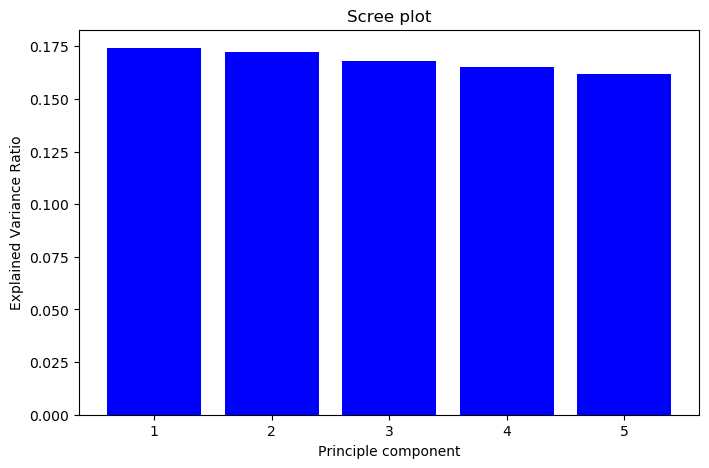

In [19]:
import matplotlib.pyplot as plt
pca.fit(x_train_std)

explained_variance_ratio=pca.explained_variance_ratio_
print(explained_variance_ratio)

plt.figure(figsize=(8,5))
plt.bar(range(1,len(explained_variance_ratio)+1),explained_variance_ratio,color='blue')
plt.title("Scree plot")
plt.xlabel("Principle component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1,len(explained_variance_ratio)+1))
plt.show()